In [19]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

import keras
from keras import layers

import numpy as np
import matplotlib.pyplot as plt

In [20]:
from keras import backend as K
print(K.backend())

tensorflow


In [21]:
# Create the model
inputs = keras.Input(shape=(784,))
x = layers.Dense(256, activation="relu")(inputs)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

In [22]:
model.summary()

Model: "mnist_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,530 (795.04 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

In [24]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"],
)

In [25]:
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=0.2)

Epoch 1/10


2024-10-15 02:32:04.372931: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8606 - loss: 0.4929 - val_accuracy: 0.9556 - val_loss: 0.1546
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 910us/step - accuracy: 0.9638 - loss: 0.1247 - val_accuracy: 0.9660 - val_loss: 0.1144
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 904us/step - accuracy: 0.9765 - loss: 0.0810 - val_accuracy: 0.9728 - val_loss: 0.0912
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 980us/step - accuracy: 0.9839 - loss: 0.0575 - val_accuracy: 0.9737 - val_loss: 0.0843
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 910us/step - accuracy: 0.9885 - loss: 0.0428 - val_accuracy: 0.9745 - val_loss: 0.0880
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 912us/step - accuracy: 0.9908 - loss: 0.0303 - val_accuracy: 0.9763 - val_loss: 0.0777
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 899us/step - accuracy: 0.9934 - loss: 0.0232 - val_accuracy: 0.9777 - val_loss: 0.0770
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 902us/step - accuracy: 0.9954 - loss: 0.0177 - val_accuracy:

In [17]:
test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

313/313 - 0s - 1ms/step - accuracy: 0.9780 - loss: 0.0761
Test loss: 0.07610184699296951
Test accuracy: 0.9779999852180481


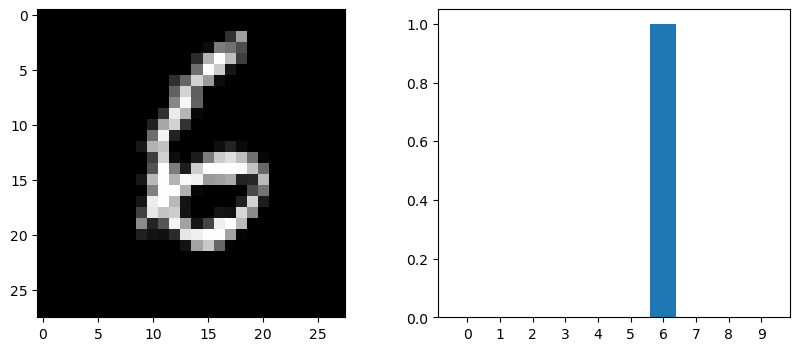

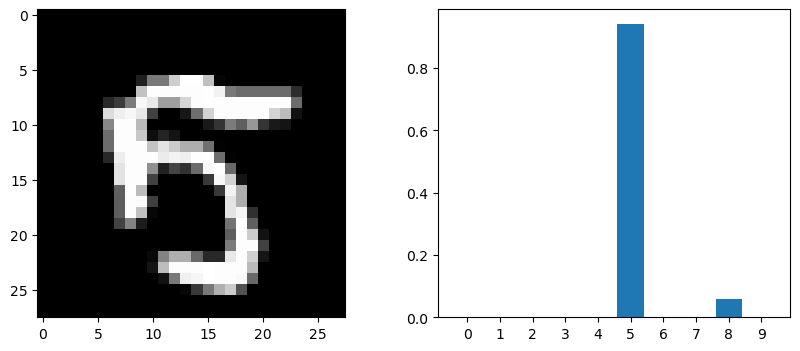

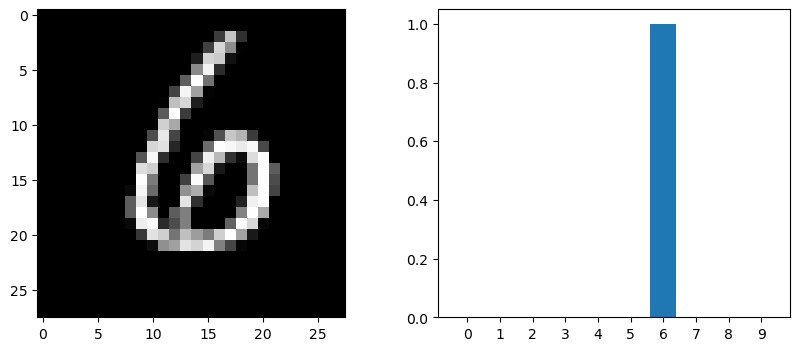

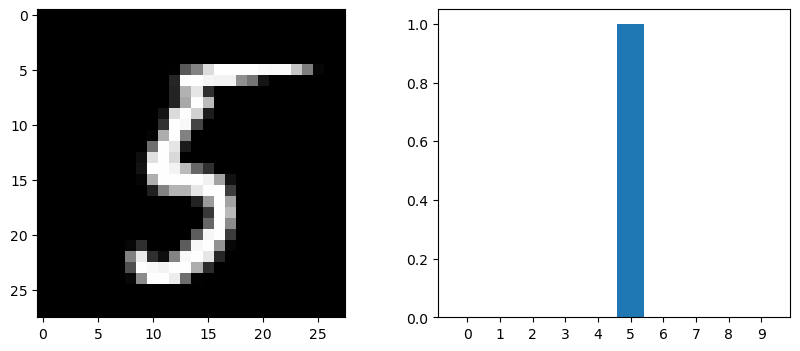

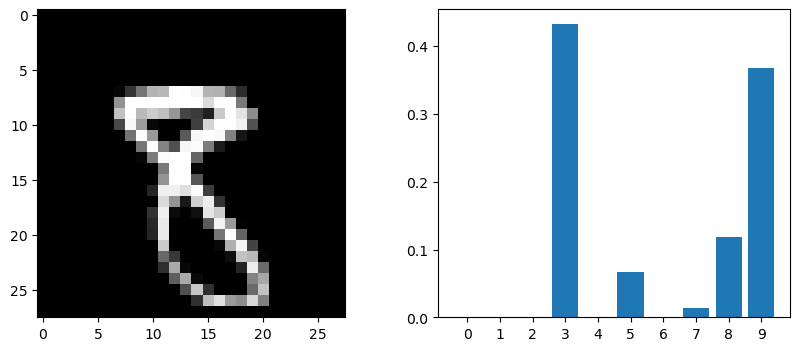

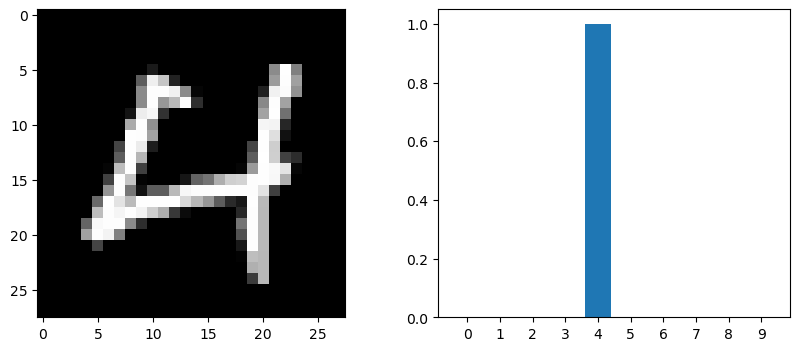

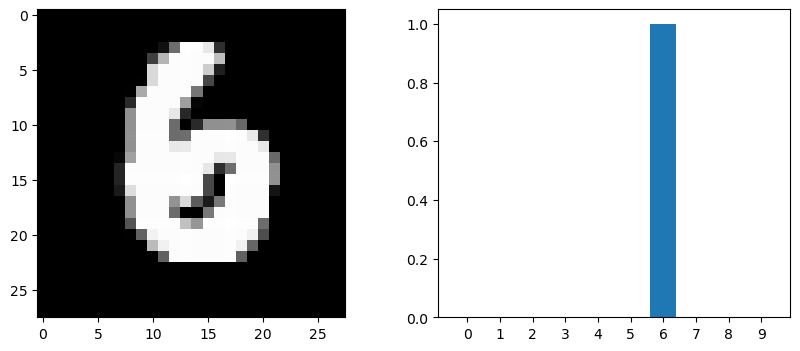

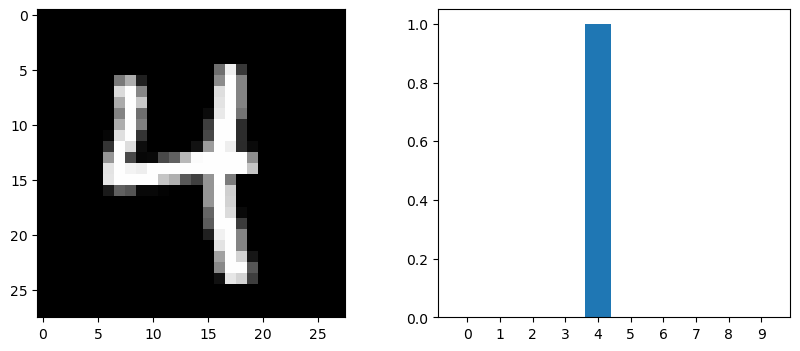

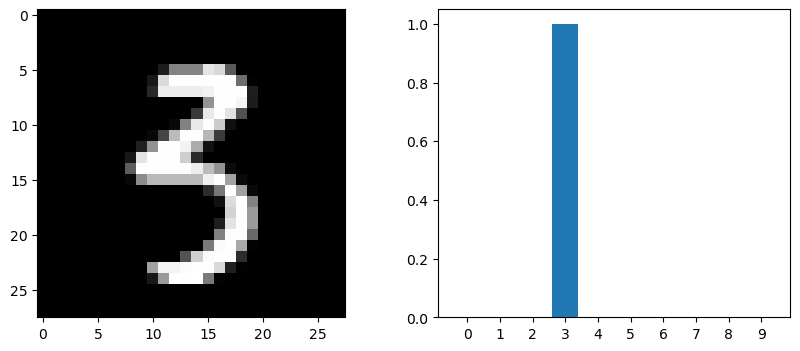

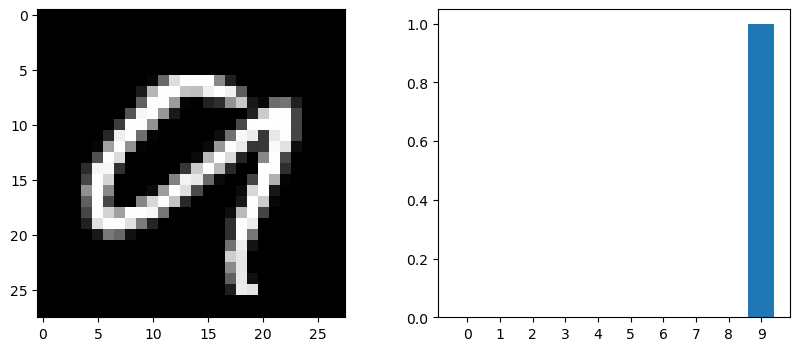

In [18]:
x = x_test
y = model(x)
start = 2000

for k in range(10):
    plt.figure(figsize=(10, 4))
    plt.subplot(1,2,1)
    plt.imshow(x[start+k].reshape((28, 28)), cmap='gray')
    ind = np.arange(0, 10)
    plt.subplot(1,2,2)
    plt.bar(ind, y[start+k].numpy().flatten())
    plt.xticks(range(10))